# GluonTS - Transfer Learning Approach (monthly) - 2/2

- Two datasets: A and B
- Dataset A: Dataset subsetted by frequency, i.e. `m4_monthly`
- Dataset B: Dataset subsetted by frequency and by domain, i.e. `m4_monthly_industry`
- Network A: Trained on dataset A
- Network B: Trained on dataset B
- Both networks are evaluated on dataset B. 

- Adjust epochs to account for different size of the datasets

Goal: Check TZ1: "Does the network learn from time series of the same domain or is it helpful to use time series from other domains?"

- Both networks are trained for ten trials (deepar) or three trials (deepstate)

Note that there are already results where a network is trained on `m4_frequency_domain` and evaluated on the same network.

In [1]:
!pip install mxnet=="1.4.1"

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Imports



In [3]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.2
1.4.1


In [4]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [5]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [6]:
dataset = get_dataset("m4_weekly", regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly.


### mv the data

Before moving on: Move the respective data according the required folder structure. In AWS:

- `mv [dataname] ../../.mxnet/gluon-ts/datasets/`

## Check the data

In [13]:
dataname_a = "m4_monthly_atm"
dataset_a = get_dataset(dataname_a, regenerate=False)
len(dataset_a.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_atm.


48000

In [9]:
dataname_b1 = "m4_monthly_macro"
dataset_b1 = get_dataset(dataname_b1, regenerate=False)
len(dataset_b1.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_macro.


10016

In [10]:
dataname_b2 = "m4_monthly_micro"
dataset_b2 = get_dataset(dataname_b2, regenerate=False)
len(dataset_b2.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_micro.


10975

In [11]:
dataname_b3 = "m4_monthly_other"
dataset_b3 = get_dataset(dataname_b3, regenerate=False)
len(dataset_b3.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_other.


277

### Dataset A


dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 48000
length test: 48000

start:
 1750-01-31 00:00:00
target:
 [8000. 8350. 8570. 7700. 7080. 6520. 6070. 6650. 6830. 5710.]
feat_static_cat:
 [1]


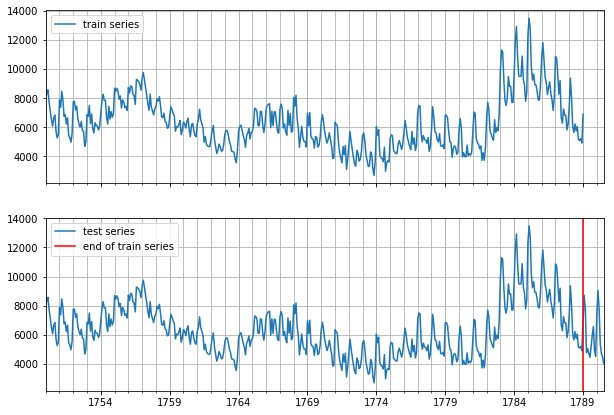

In [14]:
train_entry_a = next(iter(dataset_a.train))
test_entry_a = next(iter(dataset_a.test))

print(train_entry_a.keys())
print(test_entry_a.keys())
print("length train:", len(dataset_a.train))
print("length test:", len(dataset_a.test))


print("\nstart:\n",train_entry_a["start"])
print("target:\n", train_entry_a["target"][:10])
print("feat_static_cat:\n", train_entry_a["feat_static_cat"])

train_series_a = to_pandas(train_entry_a)
test_series_a = to_pandas(test_entry_a)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_a.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_a.plot(ax=ax[1])
ax[1].axvline(train_series_a.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Dataset B

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 10016
length test: 10016

start:
 1750-01-31 00:00:00
target:
 [8000. 8350. 8570. 7700. 7080. 6520. 6070. 6650. 6830. 5710.]
feat_static_cat:
 [1]


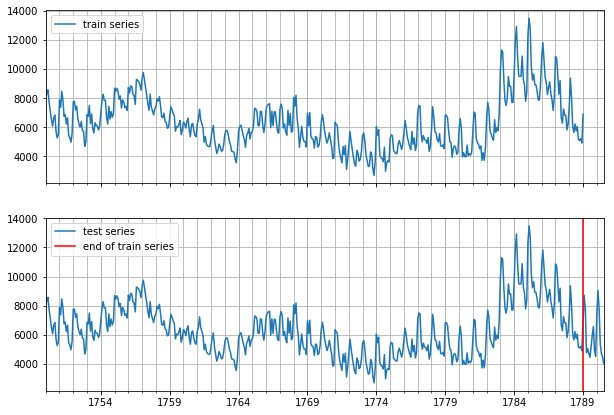

In [16]:
dataset_b = dataset_b1

train_entry_b = next(iter(dataset_b.train))
test_entry_b = next(iter(dataset_b.test))

print(train_entry_b.keys())
print(test_entry_b.keys())
print("length train:", len(dataset_b.train))
print("length test:", len(dataset_b.test))

print("\nstart:\n",train_entry_b["start"])
print("target:\n", train_entry_b["target"][:10])
print("feat_static_cat:\n", train_entry_b["feat_static_cat"])

train_series_b = to_pandas(train_entry_b)
test_series_b = to_pandas(test_entry_b)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_b.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_b.plot(ax=ax[1])
ax[1].axvline(train_series_b.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Comparison of both datasets

- Compare whether both datasets have the same length


In [17]:
# Check length
print("Length test train:", len(dataset_a.train) == len(dataset_b.train))
print("Length test test:", len(dataset_a.test) == len(dataset_b.test))

# Check frequency
print("Frequency test:",(dataset_a.metadata.freq == dataset_b.metadata.freq))


Length test train: False
Length test test: False
Frequency test: True


## Modeling: DeepAR

In [18]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [19]:
# A: dataset_a
# B: dataset_b
print(dataset_a)
print("\n", dataset_b)

TrainDatasets(metadata=MetaData(freq='M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='48000')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=18), train=<gluonts.dataset.common.FileDataset object at 0x7ff6030fdef0>, test=<gluonts.dataset.common.FileDataset object at 0x7ff6030360b8>)

 TrainDatasets(metadata=MetaData(freq='M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='10016')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=18), train=<gluonts.dataset.common.FileDataset object at 0x7ff6031496d8>, test=<gluonts.dataset.common.FileDataset object at 0x7ff6030ea4a8>)


In [20]:
print(dataname_a)
print(dataname_b)

m4_monthly_atm


NameError: name 'dataname_b' is not defined

In [21]:
def deepar_train_eval(dataname_a, dataname_b, seed=42, epochs=100, num_batches=100):
    """
    Function that trains a network using data from dataset B and evaluates the trained network on dataset A.
    Dataset A is the dataset of interest for our analysis. 
    """    
    
    dataset_a = get_dataset(dataname_a, regenerate=False)
    dataset_b = get_dataset(dataname_b, regenerate=False)
    
    # Assert checks
    assert (dataset_a.metadata.freq == dataset_b.metadata.freq)
#     assert ( len(dataset_a.train)==len(dataset_b.train) )
#     assert ( len(dataset_a.test)==len(dataset_b.test))
    
    mx.random.seed(seed)
    np.random.seed(seed)

    # define trainer
    trainer=Trainer(
        ctx=mx.cpu(),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
    )

    estimator=DeepAREstimator(
        trainer=trainer,
        context_length=dataset_a.metadata.prediction_length,
        prediction_length=dataset_a.metadata.prediction_length,
        freq=dataset_a.metadata.freq,
        use_feat_static_cat=False,
    )
    
#     estimator = DeepAREstimator(
#         trainer=trainer,
#         cardinality= [
#             feat_static_cat.cardinality 
#             for feat_static_cat in dataset_a.metadata.feat_static_cat
#         ],
#         context_length=dataset_a.metadata.prediction_length,
#         prediction_length=dataset_a.metadata.prediction_length,
#         freq=dataset_a.metadata.freq,
#         use_feat_static_cat=True
#     )
    
    # predictor trained on dataset_a, evaluated on dataset_b
    predictor_a=estimator.train(training_data=dataset_a.train)
    
    forecast_it, ts_it = make_evaluation_predictions(
        dataset_b.test, predictor=predictor_a, num_samples=100
    )
    
    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series = len(dataset_b.test))
    
    metrics=["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}
    
    output["seed"]=seed
    output["epochs"]=epochs
    output["num_batches"]=num_batches
    output["train data"]=dataname_a
    output["eval data"]=dataname_b
    
    df=pd.DataFrame([output])

    return df

    

## Subsets

In [22]:
print(dataname_a)
print(dataname_b1)

m4_monthly_atm
m4_monthly_macro


## Study 1: `m4_monthly` vs. `m4_monthly_macro` trained network

### Run I.: Training: A, Eval: B

- 10 trials training a network on dataset a and evaluating network on data a

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_atm", dataname_b="m4_monthly_macro", seed=i, epochs=400, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_atm.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]

Next seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.02it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[0] Elapsed time 5.884 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.343221
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.47it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[1] Elapsed time 5.423 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.623668
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.69it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[2] Elapsed time 5.660 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.966132
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 14.85it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[3] Elapsed time 6.747 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.876541
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 16.74it/s, avg_epoch_loss=

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 16.87it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[37] Elapsed time 5.937 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.018014
INFO:root:Loading parameters from best epoch (17)
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 17.80it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[38] Elapsed time 5.625 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.879292
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 18.42it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[39] Elapsed time 5.437 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.470131
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.90it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[40] Elapsed time 5.033 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.181063
INFO:root:Epoch[41] Learning rate is 0.00025
100%|█████████

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.08it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[73] Elapsed time 5.246 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.184395
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.91it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[74] Elapsed time 5.030 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.383841
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.76it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[75] Elapsed time 5.067 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.065597
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.54it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[76] Elapsed time 5.398 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.272950
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.65it/s, avg_epoch_loss=6.4]
INF

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.96it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[110] Elapsed time 5.015 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.600730
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.63it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[111] Elapsed time 5.103 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.173856
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.30it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[112] Elapsed time 5.191 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.797600
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.19it/s, avg_epoch_loss=8.02]
INFO:root:Epoch[113] Elapsed time 5.503 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=8.023549
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.32it/s, avg_epoch_lo

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.112952
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.28it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[147] Elapsed time 5.193 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.714579
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.95it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[148] Elapsed time 5.018 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.447885
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.33it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[149] Elapsed time 4.927 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.356112
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.82it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[150] Elapsed time 5.619 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.952841
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 17.71it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[183] Elapsed time 5.656 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.827077
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.80it/s, avg_epoch_loss=5.96]
INFO:root:Epoch[184] Elapsed time 5.059 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.956629
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.53it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[185] Elapsed time 5.126 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.490474
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.61it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[186] Elapsed time 5.107 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.071197
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.23it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.83it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[220] Elapsed time 5.317 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.712535
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.62it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[221] Elapsed time 5.679 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=7.135225
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.38it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[222] Elapsed time 5.167 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.279786
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.79it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[223] Elapsed time 5.059 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.715267
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.90it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.672818
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.57it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[257] Elapsed time 5.391 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=7.089581
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.26it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[258] Elapsed time 5.799 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.502381
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.91it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[259] Elapsed time 5.033 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.111120
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.14it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[260] Elapsed time 4.971 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.386632
INFO:root:Epoch[261] Learning rate is 5e-05


100%|██████████| 100/100 [00:05<00:00, 18.75it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[293] Elapsed time 5.342 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.187246
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.12it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[294] Elapsed time 5.234 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.038948
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.16it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[295] Elapsed time 5.227 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.990953
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.52it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[296] Elapsed time 5.408 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.975094
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.84it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.15it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[330] Elapsed time 5.519 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.287958
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.34it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[331] Elapsed time 5.178 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.979818
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.22it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[332] Elapsed time 5.496 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.980926
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.71it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[333] Elapsed time 5.652 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.104649
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.11it/s, avg_epoch_l

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.733263
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.74it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[367] Elapsed time 5.345 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.958846
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.94it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[368] Elapsed time 5.287 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=7.311857
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.72it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[369] Elapsed time 5.077 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.895006
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.82it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[370] Elapsed time 5.324 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.920865
INFO:root:Epoch[371] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.080063  0.147522  20.951993            0.131862            0.089286   

   seed  epochs  num_batches      train data         eval data  
0    42     400          100  m4_monthly_atm  m4_monthly_macro  
Next seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 19.53it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[0] Elapsed time 5.125 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.228455
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.80it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 4.811 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.628459
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.38it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[2] Elapsed time 5.166 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.114693
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.74it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[3] Elapsed time 4.824 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.839976
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.33it/s, avg_epoch_loss=

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:04<00:00, 20.97it/s, avg_epoch_loss=5.81]
INFO:root:Epoch[37] Elapsed time 4.772 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.808802
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:04<00:00, 20.73it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[38] Elapsed time 4.827 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.464351
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:04<00:00, 20.42it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[39] Elapsed time 4.900 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.944855
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:04<00:00, 21.15it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[40] Elapsed time 4.734 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.220884
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:04<00:00, 21.24it/s, avg_epoch_loss=7.0

100%|██████████| 100/100 [00:04<00:00, 20.08it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[73] Elapsed time 4.988 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.317707
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 20.18it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[74] Elapsed time 4.961 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.501502
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:05<00:00, 18.61it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[75] Elapsed time 5.382 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.057750
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:05<00:00, 19.72it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[76] Elapsed time 5.075 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.723752
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:05<00:00, 19.56it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[77] Elapsed time 5

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.35it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[110] Elapsed time 5.174 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.602310
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.09it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[111] Elapsed time 5.246 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.176375
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.40it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[112] Elapsed time 5.160 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.076702
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.20it/s, avg_epoch_loss=8.08]
INFO:root:Epoch[113] Elapsed time 5.500 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=8.084923
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.49it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.019261
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.91it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[147] Elapsed time 5.296 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.645034
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.70it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[148] Elapsed time 5.084 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.457369
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.06it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[149] Elapsed time 4.993 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.472114
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.01it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[150] Elapsed time 5.558 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.757861
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 18.06it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[183] Elapsed time 5.542 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.517346
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.49it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[184] Elapsed time 4.888 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.155978
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.48it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[185] Elapsed time 5.142 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.411777
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.23it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[186] Elapsed time 5.204 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.912611
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.53it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.52it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[220] Elapsed time 5.405 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=7.060703
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.88it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[221] Elapsed time 5.597 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=7.015836
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.41it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[222] Elapsed time 5.157 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.047707
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.16it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[223] Elapsed time 5.223 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=7.148105
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.99it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.032613
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.45it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[257] Elapsed time 5.429 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=7.076933
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 16.99it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[258] Elapsed time 5.892 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.220458
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.44it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[259] Elapsed time 5.750 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.236310
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.30it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[260] Elapsed time 5.184 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.399914
INFO:root:Epoch[261] Learning rate is 5e-05


100%|██████████| 100/100 [00:06<00:00, 15.18it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[293] Elapsed time 6.591 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.186034
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.27it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[294] Elapsed time 5.198 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.983467
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.86it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[295] Elapsed time 5.308 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.953907
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.26it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[296] Elapsed time 5.482 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=7.035658
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.04it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.11it/s, avg_epoch_loss=6]
INFO:root:Epoch[330] Elapsed time 5.529 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.004546
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.16it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[331] Elapsed time 5.834 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.128719
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.07it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[332] Elapsed time 5.542 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=7.115184
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.99it/s, avg_epoch_loss=5.96]
INFO:root:Epoch[333] Elapsed time 5.566 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.959840
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.42it/s, avg_epoch_los

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.682224
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[367] Elapsed time 5.145 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=7.581530
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.59it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[368] Elapsed time 5.690 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.799614
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.88it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[369] Elapsed time 5.304 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.068367
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.45it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[370] Elapsed time 5.147 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.954720
INFO:root:Epoch[371] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.051044  0.149138  22.327614            0.132667            0.087222   

   seed  epochs  num_batches      train data         eval data  
0    43     400          100  m4_monthly_atm  m4_monthly_macro  
Next seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.12it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[0] Elapsed time 5.851 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.398375
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.76it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1] Elapsed time 5.336 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.594616
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.52it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[2] Elapsed time 5.715 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.921513
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.47it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[3] Elapsed time 5.143 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.914622
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.74it/s, avg_epoch_loss=7

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.602819
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.69it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[37] Elapsed time 5.085 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.079047
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.45it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[38] Elapsed time 5.147 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.197690
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 18.87it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[39] Elapsed time 5.306 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.366086
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.35it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[40] Elapsed time 5.175 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.303811
INFO:root:Epoch[41] Learning rate is 0.00025
100%|

INFO:root:Loading parameters from best epoch (52)
INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.40it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[73] Elapsed time 5.162 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.236422
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.47it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[74] Elapsed time 5.143 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.623828
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.78it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[75] Elapsed time 5.330 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.202576
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.87it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[76] Elapsed time 5.307 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.164812
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100

INFO:root:Epoch[177] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.39it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[177] Elapsed time 5.446 seconds
INFO:root:Epoch[177] Evaluation metric 'epoch_loss'=6.900773
INFO:root:Epoch[178] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.51it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[178] Elapsed time 5.129 seconds
INFO:root:Epoch[178] Evaluation metric 'epoch_loss'=6.083447
INFO:root:Epoch[179] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.40it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[179] Elapsed time 5.159 seconds
INFO:root:Epoch[179] Evaluation metric 'epoch_loss'=7.442499
INFO:root:Epoch[180] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.99it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[180] Elapsed time 5.566 seconds
INFO:root:Epoch[180] Evaluation metric 'epoch_loss'=7.096007
INFO:root:Epoch[181] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.16it/s, avg_epoch_lo

INFO:root:Epoch[213] Evaluation metric 'epoch_loss'=7.065179
INFO:root:Epoch[214] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.11it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[214] Elapsed time 4.981 seconds
INFO:root:Epoch[214] Evaluation metric 'epoch_loss'=5.764953
INFO:root:Epoch[215] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.06it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[215] Elapsed time 4.990 seconds
INFO:root:Epoch[215] Evaluation metric 'epoch_loss'=6.548830
INFO:root:Epoch[216] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.77it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[216] Elapsed time 5.063 seconds
INFO:root:Epoch[216] Evaluation metric 'epoch_loss'=6.177349
INFO:root:Epoch[217] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.47it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[217] Elapsed time 5.144 seconds
INFO:root:Epoch[217] Evaluation metric 'epoch_loss'=5.861420
INFO:root:Epoch[218] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 18.61it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[250] Elapsed time 5.380 seconds
INFO:root:Epoch[250] Evaluation metric 'epoch_loss'=6.262785
INFO:root:Epoch[251] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.63it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[251] Elapsed time 5.374 seconds
INFO:root:Epoch[251] Evaluation metric 'epoch_loss'=7.090067
INFO:root:Epoch[252] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.43it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[252] Elapsed time 5.743 seconds
INFO:root:Epoch[252] Evaluation metric 'epoch_loss'=6.791145
INFO:root:Epoch[253] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.92it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[253] Elapsed time 5.026 seconds
INFO:root:Epoch[253] Evaluation metric 'epoch_loss'=6.241546
INFO:root:Epoch[254] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.69it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[254] Elapsed time 

INFO:root:Epoch[287] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.69it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[287] Elapsed time 5.084 seconds
INFO:root:Epoch[287] Evaluation metric 'epoch_loss'=6.778814
INFO:root:Epoch[288] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.23it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[288] Elapsed time 5.808 seconds
INFO:root:Epoch[288] Evaluation metric 'epoch_loss'=7.028162
INFO:root:Epoch[289] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.35it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[289] Elapsed time 5.173 seconds
INFO:root:Epoch[289] Evaluation metric 'epoch_loss'=5.699070
INFO:root:Epoch[290] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.27it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[290] Elapsed time 4.939 seconds
INFO:root:Epoch[290] Evaluation metric 'epoch_loss'=6.550780
INFO:root:Epoch[291] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.50it/s, avg_epoch_l

INFO:root:Epoch[323] Evaluation metric 'epoch_loss'=7.744647
INFO:root:Epoch[324] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.72it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[324] Elapsed time 5.074 seconds
INFO:root:Epoch[324] Evaluation metric 'epoch_loss'=6.262759
INFO:root:Epoch[325] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.30it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[325] Elapsed time 5.187 seconds
INFO:root:Epoch[325] Evaluation metric 'epoch_loss'=6.337168
INFO:root:Epoch[326] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.75it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[326] Elapsed time 5.339 seconds
INFO:root:Epoch[326] Evaluation metric 'epoch_loss'=7.018367
INFO:root:Epoch[327] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.62it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[327] Elapsed time 5.376 seconds
INFO:root:Epoch[327] Evaluation metric 'epoch_loss'=6.723268
INFO:root:Epoch[328] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 18.35it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[360] Elapsed time 5.456 seconds
INFO:root:Epoch[360] Evaluation metric 'epoch_loss'=6.989408
INFO:root:Epoch[361] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.64it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[361] Elapsed time 5.097 seconds
INFO:root:Epoch[361] Evaluation metric 'epoch_loss'=5.521186
INFO:root:Epoch[362] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[362] Elapsed time 5.145 seconds
INFO:root:Epoch[362] Evaluation metric 'epoch_loss'=6.807675
INFO:root:Epoch[363] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.70it/s, avg_epoch_loss=7]
INFO:root:Epoch[363] Elapsed time 5.656 seconds
INFO:root:Epoch[363] Evaluation metric 'epoch_loss'=7.004783
INFO:root:Epoch[364] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.75it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[364] Elapsed time 5.

INFO:root:Epoch[397] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.47it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[397] Elapsed time 5.418 seconds
INFO:root:Epoch[397] Evaluation metric 'epoch_loss'=5.692435
INFO:root:Epoch[398] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.19it/s, avg_epoch_loss=7.74]
INFO:root:Epoch[398] Elapsed time 5.218 seconds
INFO:root:Epoch[398] Evaluation metric 'epoch_loss'=7.744352
INFO:root:Epoch[399] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.28it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[399] Elapsed time 5.192 seconds
INFO:root:Epoch[399] Evaluation metric 'epoch_loss'=6.700500
INFO:root:Loading parameters from best epoch (331)
INFO:root:Final loss: 5.429252066612244 (occurred at epoch 331)
INFO:root:End model training
Running evaluation: 100%|██████████| 10016/10016 [05:38<00:00, 29.58it/s]
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_atm.
INFO:

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.099402  0.151337  21.978451            0.134772            0.099877   

   seed  epochs  num_batches      train data         eval data  
0    44     400          100  m4_monthly_atm  m4_monthly_macro  
Next seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.36it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[0] Elapsed time 5.766 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.348237
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.52it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[1] Elapsed time 5.405 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.612868
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.12it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[2] Elapsed time 5.847 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.987874
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.32it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[3] Elapsed time 5.461 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.726015
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 16.82it/s, avg_epoch_loss=

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 19.77it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[37] Elapsed time 5.061 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.008856
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 18.94it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[38] Elapsed time 5.288 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.855548
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 18.19it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[39] Elapsed time 5.501 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.382694
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 17.64it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[40] Elapsed time 5.674 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.086500
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 18.64it/s, avg_epoch_loss=6.9

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.57it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[73] Elapsed time 5.396 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.096515
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.68it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[74] Elapsed time 5.089 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.508597
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.91it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[75] Elapsed time 5.295 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.065078
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.42it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[76] Elapsed time 5.436 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.164366
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.00it/s, avg_epoch_loss=6.5]
INFO

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.01it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[110] Elapsed time 5.004 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.537606
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.07it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[111] Elapsed time 4.989 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.172605
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.64it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[112] Elapsed time 5.095 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.966251
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.66it/s, avg_epoch_loss=8.07]
INFO:root:Epoch[113] Elapsed time 5.367 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=8.071160
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.43it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.068685
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.14it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[147] Elapsed time 5.228 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.645310
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.08it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[148] Elapsed time 4.987 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.415121
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.23it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[149] Elapsed time 4.949 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.335617
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.94it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[150] Elapsed time 5.580 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.983531
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 17.80it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[183] Elapsed time 5.622 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.882021
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.00it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[184] Elapsed time 6.254 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.850102
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.51it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[185] Elapsed time 5.137 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.534942
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.01it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[186] Elapsed time 5.007 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.059495
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.88it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.02it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[220] Elapsed time 5.285 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.554070
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.01it/s, avg_epoch_loss=7]
INFO:root:Epoch[221] Elapsed time 5.268 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.995893
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[222] Elapsed time 4.848 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.576477
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.69it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[223] Elapsed time 4.415 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.397903
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.81it/s, avg_epoch_loss

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.523542
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.10it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[257] Elapsed time 5.852 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=7.261014
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.89it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[258] Elapsed time 5.298 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.506266
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.51it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[259] Elapsed time 4.651 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.041930
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.93it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[260] Elapsed time 5.019 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.413469
INFO:root:Epoch[261] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 18.05it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[293] Elapsed time 5.545 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.414246
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.70it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[294] Elapsed time 5.085 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.949575
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.49it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[295] Elapsed time 5.139 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.885266
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.17it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[296] Elapsed time 5.512 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=7.079114
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.01it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.10it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[330] Elapsed time 4.983 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.285883
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.92it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[331] Elapsed time 4.788 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.796105
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.88it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[332] Elapsed time 4.793 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=7.007298
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.02it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[333] Elapsed time 4.996 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.271660
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.25it/s, avg_epoch_l

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.699000
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.59it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[367] Elapsed time 5.387 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=7.245844
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.81it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[368] Elapsed time 5.322 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=7.053008
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.51it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[369] Elapsed time 5.408 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.937256
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.56it/s, avg_epoch_loss=7]
INFO:root:Epoch[370] Elapsed time 5.396 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=7.004982
INFO:root:Epoch[371] Learning rate is 5e-05
10

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.044193  0.147187  21.581747            0.130488            0.092577   

   seed  epochs  num_batches      train data         eval data  
0    45     400          100  m4_monthly_atm  m4_monthly_macro  
Next seed: 46


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 18.41it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[0] Elapsed time 5.437 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.354535
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.66it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[1] Elapsed time 5.091 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.546794
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.71it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[2] Elapsed time 5.651 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.956486
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.00it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[3] Elapsed time 5.267 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.909110
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.33it/s, avg_epoch_loss=

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.563416
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 20.04it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[37] Elapsed time 4.995 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.042857
INFO:root:Loading parameters from best epoch (17)
INFO:root:Epoch[38] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 19.71it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[38] Elapsed time 5.076 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.416074
INFO:root:Epoch[39] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 18.45it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[39] Elapsed time 5.423 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.420782
INFO:root:Epoch[40] Learning rate is 0.000125
100%|██████████| 100/100 [00:04<00:00, 20.93it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[40] Elapsed time 4.782 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.44

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.64it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[73] Elapsed time 4.626 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.433551
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.35it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[74] Elapsed time 4.477 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.343651
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.16it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[75] Elapsed time 4.964 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.137897
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.15it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[76] Elapsed time 4.520 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.095134
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.58it/s, avg_epoch_loss=6.94]
INF

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.61it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[110] Elapsed time 5.106 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.604409
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.14it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[111] Elapsed time 5.230 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.248944
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.80it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[112] Elapsed time 6.337 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.327010
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.00it/s, avg_epoch_loss=7.81]
INFO:root:Epoch[113] Elapsed time 5.560 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.811173
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.52it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.029334
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.88it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[147] Elapsed time 5.032 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.612087
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.49it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[148] Elapsed time 5.143 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.614340
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.96it/s, avg_epoch_loss=7.49]
INFO:root:Epoch[149] Elapsed time 4.777 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.488490
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.06it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[150] Elapsed time 4.992 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.765753
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 18.52it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[183] Elapsed time 5.403 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.666607
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.02it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[184] Elapsed time 6.245 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.165589
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.06it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[185] Elapsed time 5.253 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.466665
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.10it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[186] Elapsed time 5.241 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.094544
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.31it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.45it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[220] Elapsed time 5.426 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.907123
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.08it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[221] Elapsed time 5.543 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=7.199231
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.33it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[222] Elapsed time 5.179 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.230653
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.06it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[223] Elapsed time 4.991 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.899141
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.64it/s, avg_epoch_lo

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.245818
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.15it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[257] Elapsed time 4.519 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=7.149928
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.52it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[258] Elapsed time 4.652 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.029921
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.44it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[259] Elapsed time 4.671 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.421846
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.26it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[260] Elapsed time 4.711 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.295940
INFO:root:Epoch[261] Learning rate is 5e-05


100%|██████████| 100/100 [00:05<00:00, 18.72it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[293] Elapsed time 5.346 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.756902
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.51it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[294] Elapsed time 5.132 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.212656
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.38it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[295] Elapsed time 5.167 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=7.066016
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.12it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[296] Elapsed time 5.524 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.916383
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.04it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.34it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[330] Elapsed time 4.693 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.645994
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.92it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[331] Elapsed time 4.566 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.792710
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.08it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[332] Elapsed time 5.243 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=7.050350
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.11it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[333] Elapsed time 4.741 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.742093
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.31it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.777654
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.55it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[367] Elapsed time 5.122 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=7.624890
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.75it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[368] Elapsed time 5.341 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.910320
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.34it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[369] Elapsed time 5.175 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.116617
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.29it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[370] Elapsed time 5.189 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=7.051835
INFO:root:Epoch[371] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.206778  0.152538  23.859462            0.137256            0.099557   

   seed  epochs  num_batches      train data         eval data  
0    46     400          100  m4_monthly_atm  m4_monthly_macro  
Next seed: 47


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 18.06it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[0] Elapsed time 5.541 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.524677
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.14it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1] Elapsed time 5.231 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.593983
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.04it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[2] Elapsed time 5.875 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.822429
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 14.97it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[3] Elapsed time 6.687 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.781927
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 16.69it/s, avg_epoch_loss=

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.471491
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 20.33it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[37] Elapsed time 4.922 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.042505
INFO:root:Loading parameters from best epoch (17)
INFO:root:Epoch[38] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 19.61it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[38] Elapsed time 5.106 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.712298
INFO:root:Epoch[39] Learning rate is 0.000125
100%|██████████| 100/100 [00:04<00:00, 20.24it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[39] Elapsed time 4.950 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.235526
INFO:root:Epoch[40] Learning rate is 0.000125
100%|██████████| 100/100 [00:04<00:00, 21.69it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[40] Elapsed time 4.615 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.56

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.76it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[73] Elapsed time 5.069 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.433235
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.11it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[74] Elapsed time 4.981 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.441451
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.49it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[75] Elapsed time 6.071 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.169960
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.88it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[76] Elapsed time 5.303 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.150474
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.81it/s, avg_epoch_loss=6.91]
IN

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.13it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[110] Elapsed time 5.235 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.620114
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.90it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[111] Elapsed time 5.294 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.260824
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.93it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[112] Elapsed time 5.299 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.211096
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.71it/s, avg_epoch_loss=7.9]
INFO:root:Epoch[113] Elapsed time 5.348 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.904211
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.59it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.139872
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.08it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[147] Elapsed time 4.983 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.672448
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.64it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[148] Elapsed time 4.628 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.417890
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 23.57it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[149] Elapsed time 4.248 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.354561
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.44it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[150] Elapsed time 4.896 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.944015
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 18.33it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[183] Elapsed time 5.463 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.554197
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.94it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[184] Elapsed time 5.019 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.186332
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.17it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[185] Elapsed time 5.220 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.440242
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.31it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[186] Elapsed time 4.929 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.066049
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.71it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.33it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[220] Elapsed time 4.925 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.733093
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.61it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[221] Elapsed time 5.103 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=7.085833
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.11it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[222] Elapsed time 4.527 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.372765
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.00it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[223] Elapsed time 4.551 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.637589
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.36it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.002659
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.27it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[257] Elapsed time 5.481 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=7.079372
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.57it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[258] Elapsed time 5.393 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.184223
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.19it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[259] Elapsed time 4.960 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.304274
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.49it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[260] Elapsed time 4.888 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.408185
INFO:root:Epoch[261] Learning rate is 5e-05


100%|██████████| 100/100 [00:05<00:00, 18.63it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[293] Elapsed time 5.375 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.376653
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.55it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[294] Elapsed time 5.123 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.977002
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.06it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[295] Elapsed time 5.251 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.928106
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.16it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[296] Elapsed time 5.513 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=7.057101
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.24it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.14it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[330] Elapsed time 5.518 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.594623
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.67it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[331] Elapsed time 5.089 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.489715
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.20it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[332] Elapsed time 5.214 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=7.191733
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.04it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[333] Elapsed time 5.875 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.454183
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.85it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.968832
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.32it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[367] Elapsed time 5.184 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.702947
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.46it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[368] Elapsed time 5.423 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=7.429660
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.73it/s, avg_epoch_loss=6]
INFO:root:Epoch[369] Elapsed time 5.349 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.000320
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.98it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[370] Elapsed time 5.278 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.720904
INFO:root:Epoch[371] Learning rate is 5e-05
100

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.055299  0.153068  21.354423            0.134407            0.089923   

   seed  epochs  num_batches      train data         eval data  
0    47     400          100  m4_monthly_atm  m4_monthly_macro  
Next seed: 48


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 19.55it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[0] Elapsed time 5.123 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.454194
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.92it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 5.026 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.629461
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[2] Elapsed time 5.140 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.299113
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.60it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[3] Elapsed time 4.861 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.091340
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.61it/s, avg_epoch_loss=7

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.668624
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 18.86it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[37] Elapsed time 5.304 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.209881
INFO:root:Loading parameters from best epoch (17)
INFO:root:Epoch[38] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 19.03it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[38] Elapsed time 5.259 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.278938
INFO:root:Epoch[39] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 17.92it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[39] Elapsed time 5.584 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.661844
INFO:root:Epoch[40] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 18.97it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[40] Elapsed time 5.276 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.600

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.44it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[73] Elapsed time 5.152 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.470313
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.06it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[74] Elapsed time 5.255 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.356552
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.87it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[75] Elapsed time 5.304 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.190828
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.44it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[76] Elapsed time 5.737 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.569342
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.72it/s, avg_epoch_loss=6.6]
INF

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.24it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[110] Elapsed time 4.946 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.641549
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.85it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[111] Elapsed time 5.043 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.272146
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.52it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[112] Elapsed time 5.126 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.954387
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.89it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[113] Elapsed time 5.300 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=8.122681
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.40it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.166469
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.82it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[147] Elapsed time 5.620 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.842380
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.86it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[148] Elapsed time 5.042 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.457959
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.93it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[149] Elapsed time 5.025 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.343971
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.93it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[150] Elapsed time 5.585 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=7.072242
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 17.25it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[183] Elapsed time 5.803 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.811639
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.76it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[184] Elapsed time 5.067 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.105463
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.69it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[185] Elapsed time 5.084 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.464720
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.69it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[186] Elapsed time 5.084 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.105553
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.00it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.16it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[220] Elapsed time 5.230 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.799059
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.43it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[221] Elapsed time 5.745 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=7.111098
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.74it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[222] Elapsed time 5.344 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.417409
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.18it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[223] Elapsed time 5.219 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.765146
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.82it/s, avg_epoch_l

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.054756
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.31it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[257] Elapsed time 4.928 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=7.124986
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.31it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[258] Elapsed time 4.487 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.402367
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.16it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[259] Elapsed time 4.521 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.275432
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.52it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[260] Elapsed time 4.449 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.435247
INFO:root:Epoch[261] Learning rate is 5e-05


100%|██████████| 100/100 [00:05<00:00, 18.18it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[293] Elapsed time 5.511 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.449389
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.15it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[294] Elapsed time 5.228 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.037488
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.21it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[295] Elapsed time 5.211 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.867750
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.66it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[296] Elapsed time 5.670 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=7.081052
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.61it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.92it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[330] Elapsed time 5.588 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.499423
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.49it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[331] Elapsed time 5.141 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.821250
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.47it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[332] Elapsed time 5.141 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=7.139685
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.88it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[333] Elapsed time 5.597 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.564416
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.50it/s, avg_epoch_l

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.914781
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.43it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[367] Elapsed time 5.150 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.817164
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.81it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[368] Elapsed time 5.620 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=7.597977
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.32it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[369] Elapsed time 5.182 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.046246
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.95it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[370] Elapsed time 5.282 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.705544
INFO:root:Epoch[371] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.206309  0.145756  20.881782             0.13419            0.092758   

   seed  epochs  num_batches      train data         eval data  
0    48     400          100  m4_monthly_atm  m4_monthly_macro  
Next seed: 49


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.35it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[0] Elapsed time 5.771 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.498876
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.21it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 5.503 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.627037
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.14it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2] Elapsed time 5.841 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.097273
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.01it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[3] Elapsed time 5.267 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.950172
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.18it/s, avg_epoch_loss=7.

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.667398
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 21.23it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[37] Elapsed time 4.716 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.167294
INFO:root:Loading parameters from best epoch (17)
INFO:root:Epoch[38] Learning rate is 0.000125
100%|██████████| 100/100 [00:04<00:00, 22.25it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[38] Elapsed time 4.496 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.369793
INFO:root:Epoch[39] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 19.99it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[39] Elapsed time 5.004 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.620798
INFO:root:Epoch[40] Learning rate is 0.000125
100%|██████████| 100/100 [00:04<00:00, 20.53it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[40] Elapsed time 4.872 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.56

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.93it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[73] Elapsed time 5.025 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.607600
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.91it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[74] Elapsed time 5.029 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.385093
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.24it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[75] Elapsed time 5.492 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.273943
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.68it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[76] Elapsed time 5.087 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.209135
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.26it/s, avg_epoch_loss=7.06]
IN

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.14it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[110] Elapsed time 5.235 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.620963
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.36it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[111] Elapsed time 5.173 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.215733
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.98it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[112] Elapsed time 5.276 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.329390
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.50it/s, avg_epoch_loss=7.9]
INFO:root:Epoch[113] Elapsed time 6.456 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.895168
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.03it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.068096
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.79it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[147] Elapsed time 5.629 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.666701
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.17it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[148] Elapsed time 5.509 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.467103
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.54it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[149] Elapsed time 5.126 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.467169
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.07it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[150] Elapsed time 5.543 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.909712
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 17.03it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[183] Elapsed time 5.881 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.854100
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.63it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[184] Elapsed time 5.102 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.079174
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.87it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[185] Elapsed time 5.041 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.538611
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.75it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[186] Elapsed time 5.070 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.172941
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.69it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.58it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[220] Elapsed time 5.389 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.535068
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.94it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[221] Elapsed time 5.286 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=7.029950
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.59it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[222] Elapsed time 5.111 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.604770
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.99it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[223] Elapsed time 5.009 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.457322
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.15it/s, avg_epoch_l

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.544578
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.20it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[257] Elapsed time 5.216 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=7.179783
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.84it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[258] Elapsed time 5.049 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.790303
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.25it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[259] Elapsed time 4.712 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.009629
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[260] Elapsed time 4.846 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.452471
INFO:root:Epoch[261] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 19.97it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[293] Elapsed time 5.011 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.663211
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.83it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[294] Elapsed time 4.808 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.091749
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.48it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[295] Elapsed time 4.891 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.693637
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.50it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[296] Elapsed time 5.133 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.985919
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.66it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.20it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[330] Elapsed time 5.504 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.618992
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.87it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[331] Elapsed time 5.307 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.647214
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.91it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[332] Elapsed time 5.294 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=7.201873
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.62it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[333] Elapsed time 5.680 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.532605
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.91it/s, avg_epoch_l

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.910073
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.41it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[367] Elapsed time 5.157 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.771565
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.64it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[368] Elapsed time 5.370 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=7.470469
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.32it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[369] Elapsed time 5.182 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.044951
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.92it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[370] Elapsed time 5.289 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.713439
INFO:root:Epoch[371] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.227466  0.156177  23.261367            0.136535            0.091744   

   seed  epochs  num_batches      train data         eval data  
0    49     400          100  m4_monthly_atm  m4_monthly_macro  
Next seed: 50


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.34it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[0] Elapsed time 5.776 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.221130
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.78it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1] Elapsed time 5.336 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.594396
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 16.92it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[2] Elapsed time 5.918 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.938321
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.65it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[3] Elapsed time 5.671 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.908770
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.32it/s, avg_epoch_loss=

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.637914
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 22.37it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[37] Elapsed time 4.477 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.125625
INFO:root:Loading parameters from best epoch (17)
INFO:root:Epoch[38] Learning rate is 0.000125
100%|██████████| 100/100 [00:04<00:00, 21.69it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[38] Elapsed time 4.619 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.303975
INFO:root:Epoch[39] Learning rate is 0.000125
100%|██████████| 100/100 [00:04<00:00, 20.37it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[39] Elapsed time 4.917 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.600820
INFO:root:Epoch[40] Learning rate is 0.000125
100%|██████████| 100/100 [00:04<00:00, 21.10it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[40] Elapsed time 4.745 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.4652

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.14it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[73] Elapsed time 4.974 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.412595
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[74] Elapsed time 5.145 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.406016
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.50it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[75] Elapsed time 5.135 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.156006
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.56it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[76] Elapsed time 5.699 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.459467
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.52it/s, avg_epoch_loss=6.68]
IN

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.81it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[110] Elapsed time 5.051 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.617844
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.91it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[111] Elapsed time 5.030 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.314408
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.04it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[112] Elapsed time 5.259 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.152801
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.91it/s, avg_epoch_loss=8.08]
INFO:root:Epoch[113] Elapsed time 5.292 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=8.078150
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.50it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.153169
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.24it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[147] Elapsed time 5.489 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.785966
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.26it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[148] Elapsed time 5.197 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.435168
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.05it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[149] Elapsed time 5.254 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.321736
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.24it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[150] Elapsed time 5.490 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=7.103848
INFO:root:Epoch[151] Learning rate is 5e-05


100%|██████████| 100/100 [00:05<00:00, 17.04it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[183] Elapsed time 5.876 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.827308
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.07it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[184] Elapsed time 5.251 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.077661
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.03it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[185] Elapsed time 5.261 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.495318
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.91it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[186] Elapsed time 5.295 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.165847
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.42it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[187] Elapsed time 

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.80it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[220] Elapsed time 5.624 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.678886
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.53it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[221] Elapsed time 5.710 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.976682
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.98it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[222] Elapsed time 5.571 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.547194
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.20it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[223] Elapsed time 5.217 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.610165
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.86it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.706900
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.43it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[257] Elapsed time 5.152 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=7.234528
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.58it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[258] Elapsed time 5.696 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.634328
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.69it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[259] Elapsed time 5.085 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.128918
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.31it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[260] Elapsed time 4.931 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.431857
INFO:root:Epoch[261] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.06it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[293] Elapsed time 4.993 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.683560
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.56it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[294] Elapsed time 4.870 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.202306
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.99it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[295] Elapsed time 4.770 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.599646
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.47it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[296] Elapsed time 5.142 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.967829
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.89it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[297] Elapsed time 4

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.21it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[330] Elapsed time 5.814 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.831977
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.19it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[331] Elapsed time 5.213 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.508888
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.09it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[332] Elapsed time 5.247 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=7.231764
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.39it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[333] Elapsed time 5.757 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.744137
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.98it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.969319
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.66it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[367] Elapsed time 5.092 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.794812
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.36it/s, avg_epoch_loss=7.48]
INFO:root:Epoch[368] Elapsed time 5.454 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=7.482743
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.68it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[369] Elapsed time 5.090 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.055644
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.17it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[370] Elapsed time 6.194 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.731842
INFO:root:Epoch[371] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.165998  0.147683  21.554417            0.134164            0.094068   

   seed  epochs  num_batches      train data         eval data  
0    50     400          100  m4_monthly_atm  m4_monthly_macro  
Next seed: 51


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.49it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[0] Elapsed time 5.724 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.268058
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.85it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[1] Elapsed time 5.311 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.520579
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.42it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[2] Elapsed time 5.749 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.200461
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.25it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[3] Elapsed time 5.202 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.779417
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.21it/s, avg_epoch_loss=7

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 19.02it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[37] Elapsed time 5.264 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.915430
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 18.80it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[38] Elapsed time 5.328 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.045795
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 18.86it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[39] Elapsed time 5.308 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.212411
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 18.86it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[40] Elapsed time 5.305 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.108862
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 17.18it/s, avg_epoch_loss=6.9

100%|██████████| 100/100 [00:04<00:00, 21.28it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[73] Elapsed time 4.704 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.038711
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 21.71it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[74] Elapsed time 4.610 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.602395
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 20.10it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[75] Elapsed time 4.979 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.081387
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 20.92it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[76] Elapsed time 4.788 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.855450
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:05<00:00, 18.59it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[77] Elapsed time 5

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.863130
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.85it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[110] Elapsed time 5.047 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.566333
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.50it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[111] Elapsed time 5.138 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.155757
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.63it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[112] Elapsed time 5.101 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.008057
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.52it/s, avg_epoch_loss=8.07]
INFO:root:Epoch[113] Elapsed time 6.450 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=8.066690
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 19.07it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[146] Elapsed time 5.251 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.036592
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.55it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[147] Elapsed time 6.879 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.875585
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.97it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[148] Elapsed time 5.280 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.268245
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.25it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[149] Elapsed time 5.203 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.370818
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.08it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.91it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[183] Elapsed time 5.585 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.985468
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.60it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[184] Elapsed time 5.117 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.845414
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.05it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[185] Elapsed time 4.995 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.562066
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.88it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[186] Elapsed time 5.036 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.122643
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.85it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.306384
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.28it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[220] Elapsed time 5.194 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.286671
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.62it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[221] Elapsed time 5.377 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=7.110559
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.39it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[222] Elapsed time 5.446 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.805946
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.89it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[223] Elapsed time 5.035 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.276919
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 19.28it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[256] Elapsed time 5.193 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.468815
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.03it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[257] Elapsed time 5.260 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=7.041810
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.65it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[258] Elapsed time 5.674 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.873109
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.59it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[259] Elapsed time 5.111 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.836821
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.33it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.65it/s, avg_epoch_loss=7.74]
INFO:root:Epoch[293] Elapsed time 5.366 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.737027
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.02it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[294] Elapsed time 5.262 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.155261
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.88it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[295] Elapsed time 5.305 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.526753
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.53it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[296] Elapsed time 5.403 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=7.053199
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.16it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=7.299188
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.97it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[330] Elapsed time 4.773 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.945690
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.14it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[331] Elapsed time 4.738 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.518788
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.45it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[332] Elapsed time 4.900 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.602598
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.29it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[333] Elapsed time 5.475 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=7.023043
INFO:root:Epoch[334] Learning rate is 5e-05


100%|██████████| 100/100 [00:05<00:00, 19.11it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[366] Elapsed time 5.241 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.116571
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.88it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[367] Elapsed time 5.304 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.648348
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.28it/s, avg_epoch_loss=7.79]
INFO:root:Epoch[368] Elapsed time 5.476 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=7.794892
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.07it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[369] Elapsed time 5.246 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.424430
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.57it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[370] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.039819  0.146297  24.079247            0.130227            0.096536   

   seed  epochs  num_batches      train data         eval data  
0    51     400          100  m4_monthly_atm  m4_monthly_macro  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches,train data,eval data
0,1.080063,0.147522,20.951993,0.131862,0.089286,42,400,100,m4_monthly_atm,m4_monthly_macro
0,1.051044,0.149138,22.327614,0.132667,0.087222,43,400,100,m4_monthly_atm,m4_monthly_macro
0,1.099402,0.151337,21.978451,0.134772,0.099877,44,400,100,m4_monthly_atm,m4_monthly_macro
0,1.044193,0.147187,21.581747,0.130488,0.092577,45,400,100,m4_monthly_atm,m4_monthly_macro
0,1.206778,0.152538,23.859462,0.137256,0.099557,46,400,100,m4_monthly_atm,m4_monthly_macro
0,1.055299,0.153068,21.354423,0.134407,0.089923,47,400,100,m4_monthly_atm,m4_monthly_macro
0,1.206309,0.145756,20.881782,0.134190,0.092758,48,400,100,m4_monthly_atm,m4_monthly_macro
0,1.227466,0.156177,23.261367,0.136535,0.091744,49,400,100,m4_monthly_atm,m4_monthly_macro
0,1.165998,0.147683,21.554417,0.134164,0.094068,50,400,100,m4_monthly_atm,m4_monthly_macro
0,1.039819,0.146297,24.079247,0.130227,0.096536,51,400,100,m4_monthly_atm,m4_monthly_macro


### Run II.: Training: B, Eval: B

- 10 trials of training a network on dataset a and evaluating it on dataset b.

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_macro", dataname_b="m4_monthly_macro", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_macro.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Next seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:02<00:00, 17.09it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[0] Elapsed time 2.931 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.565155
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.93it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[1] Elapsed time 2.799 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.121286
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 20.22it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[2] Elapsed time 2.479 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.671857
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.77it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[3] Elapsed time 2.668 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.575479
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 16.60it/s, avg_epoch_loss=7.54]
INFO

100%|██████████| 50/50 [00:02<00:00, 19.26it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[37] Elapsed time 2.605 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.022278
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.20it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[38] Elapsed time 2.611 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.531252
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 18.87it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[39] Elapsed time 2.657 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.133993
INFO:root:Loading parameters from best epoch (29)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:03<00:00, 16.58it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[40] Elapsed time 3.023 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.383467
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 18.80it/s, avg_epoch_loss=6.36]

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 20.39it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[74] Elapsed time 2.458 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.840195
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 18.91it/s, avg_epoch_loss=8.25]
INFO:root:Epoch[75] Elapsed time 2.655 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=8.253844
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 18.75it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[76] Elapsed time 2.674 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.171946
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:03<00:00, 15.92it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[77] Elapsed time 3.147 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.093677
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████|

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.046302  0.145534  22.332484            0.132071             0.09185   

   seed  epochs  num_batches        train data         eval data  
0    42     100           50  m4_monthly_macro  m4_monthly_macro  
Next seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:02<00:00, 16.69it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[0] Elapsed time 3.000 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.304947
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.50it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[1] Elapsed time 2.860 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.151964
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.22it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[2] Elapsed time 2.609 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.712131
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.24it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[3] Elapsed time 2.604 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.544787
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 15.96it/s, avg_epoch_loss=7.47]
INFO:

100%|██████████| 50/50 [00:03<00:00, 16.27it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[37] Elapsed time 3.081 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.908993
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.73it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[38] Elapsed time 2.540 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.602080
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.28it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[39] Elapsed time 2.598 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.164860
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:03<00:00, 16.15it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[40] Elapsed time 3.105 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.132938
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 18.48it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[41] Elapsed time 2.713 seconds
INFO:r

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 19.64it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[74] Elapsed time 2.552 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.826890
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 19.90it/s, avg_epoch_loss=8.24]
INFO:root:Epoch[75] Elapsed time 2.519 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=8.239272
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 20.29it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[76] Elapsed time 2.472 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.096289
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 18.17it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[77] Elapsed time 2.762 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.166139
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.021886  0.144476  21.919166            0.129316            0.091647   

   seed  epochs  num_batches        train data         eval data  
0    43     100           50  m4_monthly_macro  m4_monthly_macro  
Next seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:03<00:00, 16.38it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 3.065 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.703597
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.27it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[1] Elapsed time 2.741 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.093152
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.12it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[2] Elapsed time 2.766 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.682068
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.97it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[3] Elapsed time 2.643 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.507164
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 15.89it/s, avg_epoch_loss=7.48]
INFO:

100%|██████████| 50/50 [00:02<00:00, 19.49it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[37] Elapsed time 2.574 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.080279
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.16it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[38] Elapsed time 2.614 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.535982
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 18.54it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[39] Elapsed time 2.699 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.126026
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:03<00:00, 16.42it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[40] Elapsed time 3.048 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.126926
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 18.93it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[41] Elapsed time 2.651 seconds
INFO

100%|██████████| 50/50 [00:02<00:00, 19.08it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[74] Elapsed time 2.627 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.993106
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.58it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[75] Elapsed time 2.557 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.754293
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.12it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[76] Elapsed time 2.620 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.123978
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:04<00:00, 12.21it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[77] Elapsed time 4.104 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.011701
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.15it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[78] Elapsed time 2.617 seconds


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.025386  0.144062  20.726419            0.129269             0.09086   

   seed  epochs  num_batches        train data         eval data  
0    44     100           50  m4_monthly_macro  m4_monthly_macro  
Next seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:02<00:00, 18.80it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[0] Elapsed time 2.664 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.495279
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 20.31it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[1] Elapsed time 2.466 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.201194
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.69it/s, avg_epoch_loss=7.74]
INFO:root:Epoch[2] Elapsed time 2.546 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.737118
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 21.03it/s, avg_epoch_loss=7.49]
INFO:root:Epoch[3] Elapsed time 2.383 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.488618
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.06it/s, avg_epoch_loss=7.56]
INFO:r

100%|██████████| 50/50 [00:02<00:00, 19.48it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[37] Elapsed time 2.574 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.949449
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.60it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[38] Elapsed time 2.557 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.682189
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.32it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[39] Elapsed time 2.594 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.190331
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 17.13it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[40] Elapsed time 2.928 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.204099
INFO:root:Loading parameters from best epoch (30)
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.53it/s, avg_epoch_loss=6.49]
I

100%|██████████| 50/50 [00:02<00:00, 17.61it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[73] Elapsed time 2.848 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.103334
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.34it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[74] Elapsed time 2.592 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.896918
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.18it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[75] Elapsed time 2.615 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.767429
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.27it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[76] Elapsed time 2.601 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.080869
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 18.40it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[77] Elapsed time 2.726 seconds
INFO:root:

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.190897  0.148251  24.730275            0.134942            0.097362   

   seed  epochs  num_batches        train data         eval data  
0    45     100           50  m4_monthly_macro  m4_monthly_macro  
Next seed: 46


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:03<00:00, 16.33it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[0] Elapsed time 3.074 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.540785
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.35it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[1] Elapsed time 2.729 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.168285
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.00it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[2] Elapsed time 2.636 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.625948
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.88it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[3] Elapsed time 2.654 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.467640
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 16.65it/s, avg_epoch_loss=7.45]
INFO

100%|██████████| 50/50 [00:02<00:00, 19.41it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[37] Elapsed time 2.583 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.163469
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.12it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[38] Elapsed time 2.622 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.420007
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 18.91it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[39] Elapsed time 2.649 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.182963
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 16.76it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[40] Elapsed time 2.991 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.099048
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.58it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[41] Elapsed time 2.561 seconds
INFO:

100%|██████████| 50/50 [00:02<00:00, 19.28it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[74] Elapsed time 2.599 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.841765
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.49it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[75] Elapsed time 2.571 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.664105
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.89it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[76] Elapsed time 2.522 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.983380
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 18.07it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[77] Elapsed time 2.774 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.126832
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 17.90it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[78] Elapsed time 2.801 seconds


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.279414  0.154138  22.667628            0.138981            0.085415   

   seed  epochs  num_batches        train data         eval data  
0    46     100           50  m4_monthly_macro  m4_monthly_macro  
Next seed: 47


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:02<00:00, 16.83it/s, avg_epoch_loss=7.88]
INFO:root:Epoch[0] Elapsed time 2.976 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.876481
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.42it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[1] Elapsed time 2.721 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.172874
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.76it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[2] Elapsed time 2.669 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.676772
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.80it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[3] Elapsed time 2.661 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.511193
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 15.78it/s, avg_epoch_loss=7.43]
INFO

100%|██████████| 50/50 [00:02<00:00, 19.10it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[37] Elapsed time 2.626 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.986557
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.01it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[38] Elapsed time 2.634 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.581342
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 18.79it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[39] Elapsed time 2.669 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.233930
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:03<00:00, 15.74it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[40] Elapsed time 3.185 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.025998
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.02it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[41] Elapsed time 2.637 seconds
INFO

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 18.47it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[74] Elapsed time 2.714 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.960505
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:03<00:00, 12.90it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[75] Elapsed time 3.882 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.837921
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 18.90it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[76] Elapsed time 2.649 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.074408
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:03<00:00, 16.30it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[77] Elapsed time 3.070 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.078653
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 17.75it/s, avg_epoch_loss=6.3

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.037629  0.145545  21.825511            0.130815            0.092418   

   seed  epochs  num_batches        train data         eval data  
0    47     100           50  m4_monthly_macro  m4_monthly_macro  
Next seed: 48


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:02<00:00, 17.07it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[0] Elapsed time 2.938 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.649923
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.97it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 2.789 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.258466
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.71it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[2] Elapsed time 2.683 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.723490
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.50it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[3] Elapsed time 2.710 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.535432
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 16.00it/s, avg_epoch_loss=7.73]
INFO

100%|██████████| 50/50 [00:02<00:00, 19.39it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[37] Elapsed time 2.584 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.744148
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.59it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[38] Elapsed time 2.559 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.563166
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.45it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[39] Elapsed time 2.577 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.156750
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 16.86it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[40] Elapsed time 2.973 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.041126
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.17it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[41] Elapsed time 2.616 seconds
INFO:roo

INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 18.94it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[74] Elapsed time 2.642 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.774284
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.37it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[75] Elapsed time 2.586 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.630824
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.28it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[76] Elapsed time 2.472 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.983720
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 18.10it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[77] Elapsed time 2.767 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.107289
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 17.65it/s, avg_epoch_loss=6.64]
IN

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.319468  0.14594  22.986567            0.136157            0.105144    48   

   epochs  num_batches        train data         eval data  
0     100           50  m4_monthly_macro  m4_monthly_macro  
Next seed: 49


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:02<00:00, 17.04it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[0] Elapsed time 2.939 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.768627
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.40it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[1] Elapsed time 2.724 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.229126
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.21it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[2] Elapsed time 2.611 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.688507
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.47it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[3] Elapsed time 2.711 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.565566
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 15.74it/s, avg_epoch_loss=7.7]
INFO:

100%|██████████| 50/50 [00:02<00:00, 19.32it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[37] Elapsed time 2.596 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.035190
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.46it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[38] Elapsed time 2.576 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.580068
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.67it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[39] Elapsed time 2.549 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.112068
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:03<00:00, 16.33it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[40] Elapsed time 3.072 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.071734
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 18.73it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[41] Elapsed time 2.681 seconds
INFO

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 21.02it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[74] Elapsed time 2.384 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.823398
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 22.23it/s, avg_epoch_loss=8.16]
INFO:root:Epoch[75] Elapsed time 2.255 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=8.158189
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 22.11it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[76] Elapsed time 2.264 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.143521
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 18.48it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[77] Elapsed time 2.710 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.160574
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████|

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.134363  0.14628  21.865486            0.133285            0.089936    49   

   epochs  num_batches        train data         eval data  
0     100           50  m4_monthly_macro  m4_monthly_macro  
Next seed: 50


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:02<00:00, 16.88it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[0] Elapsed time 2.969 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.305495
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.01it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[1] Elapsed time 2.784 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.136765
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.23it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[2] Elapsed time 2.908 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.676699
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.53it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[3] Elapsed time 2.703 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.512092
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 16.76it/s, avg_epoch_loss=7.51]
INFO

100%|██████████| 50/50 [00:02<00:00, 19.23it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[37] Elapsed time 2.607 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.016058
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.20it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[38] Elapsed time 2.611 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.608427
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 18.69it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[39] Elapsed time 2.682 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.195420
INFO:root:Loading parameters from best epoch (29)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:03<00:00, 15.84it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[40] Elapsed time 3.166 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.373237
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.05it/s, avg_epoch_loss=6.5]
I

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.311707
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 19.74it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[74] Elapsed time 2.539 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.838898
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.61it/s, avg_epoch_loss=8.06]
INFO:root:Epoch[75] Elapsed time 2.555 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=8.061685
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.67it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[76] Elapsed time 2.554 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.179750
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 17.17it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[77] Elapsed time 2.919 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.216484
INFO:root:E

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.126134  0.142759  21.839412            0.130515            0.096046   

   seed  epochs  num_batches        train data         eval data  
0    50     100           50  m4_monthly_macro  m4_monthly_macro  
Next seed: 51


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:02<00:00, 17.10it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[0] Elapsed time 2.932 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.428331
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.67it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[1] Elapsed time 2.684 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.107785
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.06it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[2] Elapsed time 2.627 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.576896
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.95it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[3] Elapsed time 2.646 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.464261
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 16.22it/s, avg_epoch_loss=7.62]
INFO

100%|██████████| 50/50 [00:02<00:00, 21.60it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[37] Elapsed time 2.321 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.930068
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.59it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[38] Elapsed time 2.557 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.542981
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 20.98it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[39] Elapsed time 2.390 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.195205
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:03<00:00, 16.16it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[40] Elapsed time 3.100 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.161531
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.41it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[41] Elapsed time 2.582 seconds
INFO:

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 19.44it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[74] Elapsed time 2.578 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.910999
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 19.48it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[75] Elapsed time 2.571 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.776058
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 21.01it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[76] Elapsed time 2.385 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.114388
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:03<00:00, 16.39it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[77] Elapsed time 3.058 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.061508
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 17.79it/s, avg_epoch_loss=6.4

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.077084  0.147199  19.663035            0.132755            0.086899   

   seed  epochs  num_batches        train data         eval data  
0    51     100           50  m4_monthly_macro  m4_monthly_macro  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches,train data,eval data
0,1.046302,0.145534,22.332484,0.132071,0.091850,42,100,50,m4_monthly_macro,m4_monthly_macro
0,1.021886,0.144476,21.919166,0.129316,0.091647,43,100,50,m4_monthly_macro,m4_monthly_macro
0,1.025386,0.144062,20.726419,0.129269,0.090860,44,100,50,m4_monthly_macro,m4_monthly_macro
0,1.190897,0.148251,24.730275,0.134942,0.097362,45,100,50,m4_monthly_macro,m4_monthly_macro
0,1.279414,0.154138,22.667628,0.138981,0.085415,46,100,50,m4_monthly_macro,m4_monthly_macro
0,1.037629,0.145545,21.825511,0.130815,0.092418,47,100,50,m4_monthly_macro,m4_monthly_macro
0,1.319468,0.145940,22.986567,0.136157,0.105144,48,100,50,m4_monthly_macro,m4_monthly_macro
0,1.134363,0.146280,21.865486,0.133285,0.089936,49,100,50,m4_monthly_macro,m4_monthly_macro
0,1.126134,0.142759,21.839412,0.130515,0.096046,50,100,50,m4_monthly_macro,m4_monthly_macro
0,1.077084,0.147199,19.663035,0.132755,0.086899,51,100,50,m4_monthly_macro,m4_monthly_macro


In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_macro", dataname_b="m4_monthly_macro", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_macro.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]

Next seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 18.39it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[0] Elapsed time 5.444 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.343221
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.10it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[1] Elapsed time 5.241 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.623668
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.02it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[2] Elapsed time 5.558 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.157505
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.83it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[3] Elapsed time 5.048 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.987801
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.52it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:05<00:00, 19.88it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[37] Elapsed time 5.044 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.198801
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.93it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[38] Elapsed time 5.584 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.084327
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.65it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[39] Elapsed time 5.368 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.122854
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.94it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[40] Elapsed time 5.286 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.062250
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.60it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[41] Elapsed time 5.378 seconds


INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 19.11it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[74] Elapsed time 5.238 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.413120
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.71it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[75] Elapsed time 5.077 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.281357
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 17.86it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[76] Elapsed time 5.607 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.561261
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.89it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[77] Elapsed time 5.033 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.374531
INFO:root:Epoch[78] Learning rate is 0.00025
100%|█████████

INFO:root:Loading parameters from best epoch (89)
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.24it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[110] Elapsed time 5.489 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.626484
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.99it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[111] Elapsed time 5.271 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.065685
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.40it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[112] Elapsed time 5.158 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.232462
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 16.73it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[113] Elapsed time 5.980 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.880458
INFO:root:Epoch[114] Learning rate is 5e-05
100%|█████

100%|██████████| 100/100 [00:05<00:00, 18.97it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[146] Elapsed time 5.278 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.151109
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.90it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[147] Elapsed time 5.593 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.909170
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.01it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[148] Elapsed time 5.269 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.744877
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.81it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[149] Elapsed time 5.323 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.040563
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.29it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.12it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[183] Elapsed time 5.236 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.072467
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.18it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[184] Elapsed time 6.595 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.082216
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.39it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[185] Elapsed time 5.757 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.466974
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.40it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[186] Elapsed time 5.164 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.026397
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.80it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.031146  0.148986  16.625003             0.13258            0.081064   

   seed  epochs  num_batches        train data         eval data  
0    42     200          100  m4_monthly_macro  m4_monthly_macro  
Next seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:04<00:00, 20.12it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[0] Elapsed time 4.981 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.228455
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.45it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 4.897 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.628459
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.16it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2] Elapsed time 5.226 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.101538
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 21.26it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[3] Elapsed time 4.710 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.029126
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 23.61it/s, avg_epoch_loss=7

100%|██████████| 100/100 [00:04<00:00, 21.67it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[37] Elapsed time 4.622 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.167658
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.35it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[38] Elapsed time 4.921 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.099016
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 21.49it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[39] Elapsed time 4.657 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.340585
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.50it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[40] Elapsed time 4.890 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.978867
INFO:root:Loading parameters from best epoch (30)
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:04<00:00, 20.53it/s, avg_epoch_loss=7

100%|██████████| 100/100 [00:05<00:00, 17.31it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[73] Elapsed time 5.781 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.487453
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 18.98it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[74] Elapsed time 5.275 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.578875
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 18.38it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[75] Elapsed time 5.458 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.343232
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 18.04it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[76] Elapsed time 5.553 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.574834
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 19.03it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 100/100 [00:05<00:00, 18.67it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[109] Elapsed time 5.366 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=7.299426
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.17it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[110] Elapsed time 5.512 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.032581
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.54it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[111] Elapsed time 5.121 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.093360
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.55it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[112] Elapsed time 5.123 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.304320
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.99it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[113] Elapsed time 5

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.08it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[146] Elapsed time 5.248 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.640553
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.25it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[147] Elapsed time 5.201 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=7.250889
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.83it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[148] Elapsed time 5.614 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.522290
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.35it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[149] Elapsed time 5.175 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.371078
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.67it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.976029
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.25it/s, avg_epoch_loss=5.96]
INFO:root:Epoch[183] Elapsed time 5.487 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.958185
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.65it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[184] Elapsed time 5.093 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.255249
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.23it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[185] Elapsed time 5.490 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.944628
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.88it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[186] Elapsed time 5.036 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.012872
INFO:root:Epoch[187] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.047235  0.148169  18.279644            0.133921            0.082213   

   seed  epochs  num_batches        train data         eval data  
0    43     200          100  m4_monthly_macro  m4_monthly_macro  
Next seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.38it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[0] Elapsed time 5.761 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.398375
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 14.24it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1] Elapsed time 7.030 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.594616
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 16.80it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 5.960 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.133831
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.66it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[3] Elapsed time 5.367 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.013917
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.05it/s, avg_epoch_loss=7

100%|██████████| 100/100 [00:05<00:00, 19.50it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[37] Elapsed time 5.136 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.192735
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.48it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[38] Elapsed time 5.728 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.053914
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.49it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[39] Elapsed time 5.137 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.039616
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.88it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[40] Elapsed time 5.298 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.153090
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.60it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[41] Elapsed time 5.384 second

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 18.48it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[74] Elapsed time 5.414 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.654975
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 19.08it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[75] Elapsed time 5.249 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.084232
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 17.84it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[76] Elapsed time 5.612 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.390637
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 19.79it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[77] Elapsed time 5.058 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.384257
INFO:root:Loading parameters from best epoch (67)
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=7.349398
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.22it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[110] Elapsed time 5.495 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.946411
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.48it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[111] Elapsed time 5.140 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.054121
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.20it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[112] Elapsed time 5.217 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.254990
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.24it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[113] Elapsed time 5.807 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.941952
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 19.24it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[146] Elapsed time 5.202 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.795276
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.49it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[147] Elapsed time 5.415 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=7.114613
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.19it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[148] Elapsed time 5.507 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.217623
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.40it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[149] Elapsed time 5.162 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.589492
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.80it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[150] Elapsed time 5

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.69it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[183] Elapsed time 5.085 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.884434
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.36it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[184] Elapsed time 5.169 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.029306
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.06it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[185] Elapsed time 5.872 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.863427
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.35it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[186] Elapsed time 5.173 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.759674
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.07it/s, avg_epoch_

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.02373  0.145012  15.977515            0.130182            0.082079    44   

   epochs  num_batches        train data         eval data  
0     200          100  m4_monthly_macro  m4_monthly_macro  
Next seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.31it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[0] Elapsed time 5.781 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.348237
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.67it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[1] Elapsed time 5.362 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.612868
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.77it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[2] Elapsed time 5.633 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.247148
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.97it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[3] Elapsed time 5.283 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.976975
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.98it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:04<00:00, 21.05it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[37] Elapsed time 4.759 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.085432
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.94it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[38] Elapsed time 4.784 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.084070
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.75it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[39] Elapsed time 4.826 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.318882
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.74it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[40] Elapsed time 5.645 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.726070
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 21.25it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[41] Elapsed time 4.731 second

100%|██████████| 100/100 [00:04<00:00, 20.09it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[73] Elapsed time 4.986 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.626550
INFO:root:Loading parameters from best epoch (33)
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 21.39it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[74] Elapsed time 4.684 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.309981
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 22.22it/s, avg_epoch_loss=7.49]
INFO:root:Epoch[75] Elapsed time 4.505 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.486273
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 20.26it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[76] Elapsed time 4.938 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.801642
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 20.71it/s, avg_e

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=7.292013
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.70it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[110] Elapsed time 5.655 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.965542
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.23it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[111] Elapsed time 5.203 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.061614
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.64it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[112] Elapsed time 5.672 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.316952
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.56it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[113] Elapsed time 6.431 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.971808
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:06<00:00, 15.73it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[146] Elapsed time 6.364 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.780339
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.67it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[147] Elapsed time 5.365 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=7.180178
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.30it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[148] Elapsed time 5.471 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.281986
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.02it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[149] Elapsed time 5.264 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.630477
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.33it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.09it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[183] Elapsed time 5.243 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.979750
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.63it/s, avg_epoch_loss=7]
INFO:root:Epoch[184] Elapsed time 5.098 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.004113
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.91it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[185] Elapsed time 5.587 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.842811
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.34it/s, avg_epoch_loss=5.81]
INFO:root:Epoch[186] Elapsed time 5.177 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.806476
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.11it/s, avg_epoch_los

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.204601  0.14373  17.595897            0.130887            0.085397    45   

   epochs  num_batches        train data         eval data  
0     200          100  m4_monthly_macro  m4_monthly_macro  
Next seed: 46


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.15it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[0] Elapsed time 5.836 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.354535
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.93it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[1] Elapsed time 5.290 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.546794
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.21it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 5.817 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.129772
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.51it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[3] Elapsed time 5.130 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.046387
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.70it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:05<00:00, 18.81it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[37] Elapsed time 5.321 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.153613
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.04it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[38] Elapsed time 5.261 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.031795
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.76it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[39] Elapsed time 5.635 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.190687
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.88it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[40] Elapsed time 5.037 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.020914
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.33it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[41] Elapsed time 5.461 second

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.216377
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.26it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[74] Elapsed time 5.205 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.810209
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 18.29it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[75] Elapsed time 5.470 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.202449
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 17.98it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[76] Elapsed time 5.566 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.353361
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.45it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[77] Elapsed time 5.150 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.608068
INFO:root:Loading parameters from best epoch (67)

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=7.495484
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.71it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[110] Elapsed time 5.653 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.679635
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.29it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[111] Elapsed time 5.188 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.238270
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.87it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[112] Elapsed time 5.038 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.244009
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.83it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[113] Elapsed time 5.615 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.908254
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 19.32it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[146] Elapsed time 5.182 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.175558
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.12it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[147] Elapsed time 5.523 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.989961
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.85it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[148] Elapsed time 5.310 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.118229
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.65it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[149] Elapsed time 5.370 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.934906
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.21it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.17it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[183] Elapsed time 5.225 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.186025
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[184] Elapsed time 5.145 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.176960
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.45it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[185] Elapsed time 6.083 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.711321
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.48it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[186] Elapsed time 6.071 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.025921
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.34it/s, avg_epoch_

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.06557  0.143068  17.318262            0.129035            0.084843    46   

   epochs  num_batches        train data         eval data  
0     200          100  m4_monthly_macro  m4_monthly_macro  
Next seed: 47


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.62it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[0] Elapsed time 5.684 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.524677
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.32it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1] Elapsed time 5.463 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.593983
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 16.93it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[2] Elapsed time 5.911 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.090145
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.43it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[3] Elapsed time 5.154 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.040596
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.02it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:05<00:00, 18.82it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[37] Elapsed time 5.320 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.201057
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.12it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[38] Elapsed time 5.528 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.047429
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.40it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[39] Elapsed time 5.163 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.066193
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.47it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[40] Elapsed time 5.143 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.196454
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.10it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[41] Elapsed time 5.532 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.944120
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 21.51it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[74] Elapsed time 4.653 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.053663
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 21.01it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[75] Elapsed time 4.766 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.057651
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 21.55it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[76] Elapsed time 4.644 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.119612
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 21.38it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[77] Elapsed time 4.683 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.768817
INFO:root:Epoch[78] Learning rate is 0.00025
100

INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:05<00:00, 18.61it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[110] Elapsed time 5.379 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.574713
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 21.13it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[111] Elapsed time 4.738 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.165500
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 23.05it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[112] Elapsed time 4.345 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.207430
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:05<00:00, 19.44it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[113] Elapsed time 5.150 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.730586
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 20.86i

100%|██████████| 100/100 [00:05<00:00, 19.91it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[146] Elapsed time 5.031 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.822297
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.44it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[147] Elapsed time 5.148 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.891586
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.64it/s, avg_epoch_loss=5.96]
INFO:root:Epoch[148] Elapsed time 5.370 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.963166
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.37it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[149] Elapsed time 5.171 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.559749
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.51it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.02it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[183] Elapsed time 5.262 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.804975
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.41it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[184] Elapsed time 5.156 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.936658
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.28it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[185] Elapsed time 5.791 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.844962
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.17it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[186] Elapsed time 5.224 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.767795
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.71it/s, avg_epoch_l

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.056658  0.147132  15.943509            0.131861            0.083267   

   seed  epochs  num_batches        train data         eval data  
0    47     200          100  m4_monthly_macro  m4_monthly_macro  
Next seed: 48


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.21it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[0] Elapsed time 5.824 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.454194
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.98it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 5.273 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.629461
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.37it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[2] Elapsed time 7.481 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.276615
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.00it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[3] Elapsed time 5.561 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.131204
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.55it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:05<00:00, 19.64it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[37] Elapsed time 5.101 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.070471
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.75it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[38] Elapsed time 5.340 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.080869
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.30it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[39] Elapsed time 5.472 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.383358
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.16it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[40] Elapsed time 4.967 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.818215
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.72it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[41] Elapsed time 5.079 second

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.644282
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.30it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[74] Elapsed time 5.188 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.271011
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.23it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[75] Elapsed time 5.203 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.244981
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 18.10it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[76] Elapsed time 5.531 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.835932
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.74it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[77] Elapsed time 5.074 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.182657
INFO:root:Epoch[78] Learning rate is 0.00025
100

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=7.298746
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.35it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[110] Elapsed time 5.451 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.008137
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.82it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[111] Elapsed time 5.049 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.134502
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.83it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[112] Elapsed time 5.046 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.333005
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.23it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[113] Elapsed time 5.487 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.967050
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 19.03it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[146] Elapsed time 5.263 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.072237
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.92it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[147] Elapsed time 5.589 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=7.010266
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.96it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[148] Elapsed time 5.570 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.242299
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.64it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[149] Elapsed time 5.099 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.754769
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.40it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.56it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[183] Elapsed time 5.119 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.898982
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.14it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[184] Elapsed time 5.229 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.992564
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.09it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[185] Elapsed time 5.532 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.892472
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.44it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[186] Elapsed time 5.148 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.765470
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.03it/s, avg_epoch_l

      MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.01633  0.139534  14.48695            0.127564            0.081033    48   

   epochs  num_batches        train data         eval data  
0     200          100  m4_monthly_macro  m4_monthly_macro  
Next seed: 49


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:06<00:00, 16.64it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[0] Elapsed time 6.023 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.498876
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.88it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 5.302 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.627037
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 16.87it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[2] Elapsed time 5.935 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.267362
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.68it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[3] Elapsed time 5.087 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.070542
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.07it/s, avg_epoch_loss=7

100%|██████████| 100/100 [00:05<00:00, 19.94it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[37] Elapsed time 5.022 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.143317
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.32it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[38] Elapsed time 5.467 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.085417
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 16.20it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[39] Elapsed time 6.178 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.185252
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.62it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[40] Elapsed time 5.380 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.115892
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.07it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[41] Elapsed time 5.540 second

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.158156
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 18.96it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[74] Elapsed time 5.278 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.806994
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.14it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[75] Elapsed time 5.230 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.188471
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 18.06it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[76] Elapsed time 5.543 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.328205
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.83it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[77] Elapsed time 5.051 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.569645
INFO:root:Epoch[78] Learning rate is 0.00025
100

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=7.353511
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.64it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[110] Elapsed time 5.093 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.589478
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.37it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[111] Elapsed time 4.683 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.312116
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.15it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[112] Elapsed time 4.733 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.343264
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.58it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[113] Elapsed time 5.111 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.666699
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 21.26it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[146] Elapsed time 4.709 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.209044
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.10it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[147] Elapsed time 5.241 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.985790
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 22.77it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[148] Elapsed time 4.397 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.895283
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.16it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[149] Elapsed time 4.728 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.105533
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.33it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[150] Elapsed time 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.97it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[183] Elapsed time 5.010 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.097983
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.64it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[184] Elapsed time 5.100 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=7.037375
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.92it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[185] Elapsed time 5.587 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.660280
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.18it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[186] Elapsed time 4.963 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.921909
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.13it/s, avg_epoch_l

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.016092  0.149525  16.579136            0.132617            0.082813   

   seed  epochs  num_batches        train data         eval data  
0    49     200          100  m4_monthly_macro  m4_monthly_macro  
Next seed: 50


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 100/100 [00:05<00:00, 17.19it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[0] Elapsed time 5.826 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.221130
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.52it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1] Elapsed time 5.403 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.594396
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.68it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 5.661 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.182196
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.79it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[3] Elapsed time 5.327 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.983056
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.12it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:05<00:00, 19.59it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[37] Elapsed time 5.112 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.153884
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.85it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[38] Elapsed time 5.605 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.038131
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.43it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[39] Elapsed time 5.152 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.166882
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.89it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[40] Elapsed time 5.036 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.103245
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.67it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[41] Elapsed time 5.360 seconds

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_macro", dataname_b="m4_monthly_macro", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

## Study 2: `m4_monthly_atm` vs. `m4_monthly_micro` trained network

### Run I.: Training: A, Eval: B

- 10 trials training a network on dataset a and evaluating network on data a

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_atm", dataname_b="m4_monthly_micro", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_atm", dataname_b="m4_monthly_micro", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_atm", dataname_b="m4_monthly_micro", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

### Run II.: Training: B, Eval: B

- 10 trials of training a network on dataset a and evaluating it on dataset b.

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_micro", dataname_b="m4_monthly_micro", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_micro", dataname_b="m4_monthly_micro", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_micro", dataname_b="m4_monthly_micro", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

# Study 3: `m4_monthly_other`

## Run I - Training: A, Eval: B

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_atm", dataname_b="m4_monthly_other", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_atm", dataname_b="m4_monthly_other", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_atm", dataname_b="m4_monthly_other", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

## Run II - Training: B, Eval: B

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_other", dataname_b="m4_monthly_other", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_other", dataname_b="m4_monthly_other", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_other", dataname_b="m4_monthly_other", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results